# The Python Programming Language

From Coursera: Intro to Data Science, Week 1   
Patricia Schuster, University of Michigan  
Feb. 2017

# Reading and Writing CSV Files

In this section, I will explore how to read and write CSV files.

## Read CSV file

First, import the CSV module and set the Jupyter notebook to print two decimal places.

In [1]:
import csv

%precision 2

'%.2f'

I downloaded my data files for this course into a separate folder. I am going to access the files using the path to that folder. Use the `sys` and `os` modules to access that folder.

In [2]:
import os
import sys

In [5]:
os.listdir('../data')

['Assignment 2.ipynb',
 'Assignment 3.ipynb',
 'Assignment 4.ipynb',
 'cars.csv',
 'census.csv',
 'City_Zhvi_AllHomes.csv',
 'CO-EST2015-alldata.pdf',
 'Energy Indicators.xls',
 'gdplev.xls',
 'grades.csv',
 'log.csv',
 'log.txt',
 'mpg.csv',
 'olympics.csv',
 'scimagojr-3.xlsx',
 'university_towns.txt',
 'Week 1.ipynb',
 'Week 2.ipynb',
 'Week 3.ipynb',
 'Week 4.ipynb',
 'world_bank.csv']

Now that I have found the file, proceed with opening this file.

Use the technique `with open(filename) as file:` so that python automatically closes the file when it exits the loop. 

I can first see what I am dealing with by opening the file in excel to see what data it contains. Display a screen shot of the file open in excel:

![mpg.png](files/fig/mpg_screenshot.PNG)

In [13]:
with open('../data/mpg.csv') as csvfile:
    mpg = list(csv.DictReader(csvfile))

## Explore the data

Look at a few entries. They match the first three entries as seen in the excel view.

In [14]:
mpg[:3]

[{'': '1',
  'class': 'compact',
  'cty': '18',
  'cyl': '4',
  'displ': '1.8',
  'drv': 'f',
  'fl': 'p',
  'hwy': '29',
  'manufacturer': 'audi',
  'model': 'a4',
  'trans': 'auto(l5)',
  'year': '1999'},
 {'': '2',
  'class': 'compact',
  'cty': '21',
  'cyl': '4',
  'displ': '1.8',
  'drv': 'f',
  'fl': 'p',
  'hwy': '29',
  'manufacturer': 'audi',
  'model': 'a4',
  'trans': 'manual(m5)',
  'year': '1999'},
 {'': '3',
  'class': 'compact',
  'cty': '20',
  'cyl': '4',
  'displ': '2',
  'drv': 'f',
  'fl': 'p',
  'hwy': '31',
  'manufacturer': 'audi',
  'model': 'a4',
  'trans': 'manual(m6)',
  'year': '2008'}]

`csv.Dictreader` reads in each row of the csv file as a separate dictionary. `mpg` contains many entries, each of which is a dictionary. The order of the rows is maintained, and you can confirm that with the first entry which, in our excel file, is the number of the row. How many entries are there?

In [18]:
len(mpg)

234

In [19]:
mpg[0].keys()

dict_keys(['', 'year', 'class', 'displ', 'cty', 'trans', 'hwy', 'model', 'cyl', 'manufacturer', 'drv', 'fl'])

In [20]:
mpg[0].values()

dict_values(['1', '1999', 'compact', '1.8', '18', 'auto(l5)', '29', 'a4', '4', 'audi', 'f', 'p'])

## Perform some calculations

Calculate the average city fuel economy across all of the cars. Remember that all of the values in the dictionary are imported as strings, so we must convert to integer or float, depending on which value we are looking at. *Note: Other import methods allow the user to specify the datatype of each column. Consider numpy.genfromtxt... would that work with CSV files?*

Access the city mpg for a few entries:

In [27]:
for d in mpg[0:10]:
    print(d['cty'])

18
21
20
21
16
18
18
18
16
20


Set up a loop for calculating the sum across all of the `cty` values.

In [29]:
sum(float(d['cty']) for d in mpg) / len(mpg)

16.86

## Explore sorting, grouping entries

Use `set` to return the unique values (eliminate repitition) for the number of cylinders the cars have. Again, use the loop method through `mpg`.

In [35]:
cylinders = set(d['cyl'] for d in mpg)
print(cylinders)

{'5', '6', '8', '4'}


Now try grouping the cars by number of cylinders, and find the average cty mpg for each group.

In [38]:
CtyMpgByCyl = []

for c in cylinders: # iterate over all the cylinder levels
    summpg = 0
    cyltypecount = 0
    for d in mpg:
        if d['cyl'] == c: # if the cylinder level matches, count it
            summpg += float(d['cty'])
            cyltypecount += 1
    CtyMpgByCyl.append((c, summpg / cyltypecount)) # append tuple

In [39]:
CtyMpgByCyl

[('5', 20.50), ('6', 16.22), ('8', 12.57), ('4', 21.01)]

Sort it

In [41]:
CtyMpgByCyl.sort(key=lambda x: x[0])
CtyMpgByCyl

[('4', 21.01), ('5', 20.50), ('6', 16.22), ('8', 12.57)]

Bonus- plot it. 

In [42]:
import matplotlib.pyplot as plt

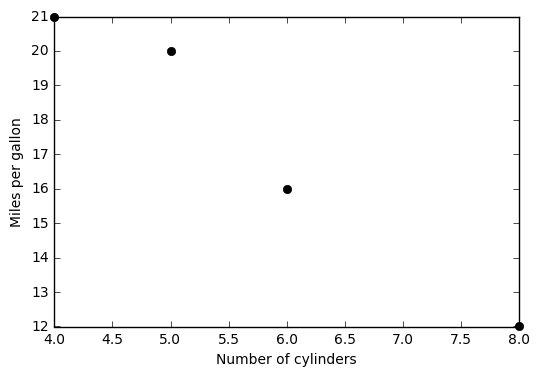

In [62]:
plt.plot([int(pair[0]) for pair in CtyMpgByCyl],[int(pair[1]) for pair in CtyMpgByCyl],'ok',clip_on=False)
plt.xlabel('Number of cylinders')
plt.ylabel('Miles per gallon')
plt.show()